# Stacked AutoEncoder

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
tf.reset_default_graph()

In [0]:
num_inputs = 784
neurons_hid1 = 392
neurons_hid2 = 196
neurons_hid3 = neurons_hid1
num_outputs = num_inputs
learning_rate = 0.01
act_func = tf.nn.relu

## Placeholder

In [0]:
X = tf.placeholder(tf.float32, shape=[None,num_inputs])

In [0]:
initializer = tf.variance_scaling_initializer()

In [0]:
w1 = tf.Variable(initializer([num_inputs,neurons_hid1]),dtype=tf.float32)
w2 = tf.Variable(initializer([neurons_hid1,neurons_hid2]),dtype=tf.float32)
w3 = tf.Variable(initializer([neurons_hid2,neurons_hid3]),dtype=tf.float32)
w4 = tf.Variable(initializer([neurons_hid3,num_outputs]),dtype=tf.float32)

In [0]:
b1 = tf.Variable(tf.zeros(neurons_hid1))
b2 = tf.Variable(tf.zeros(neurons_hid2))
b3 = tf.Variable(tf.zeros(neurons_hid3))
b4 = tf.Variable(tf.zeros(num_outputs))

In [0]:
hid_layer1 = act_func(tf.matmul(X,w1) + b1)
hid_layer2 = act_func(tf.matmul(hid_layer1,w2) + b2)
hid_layer3 = act_func(tf.matmul(hid_layer2,w3) + b3)
output_layer = act_func(tf.matmul(hid_layer3,w4) + b4)

In [0]:
loss = tf.reduce_mean(tf.square(output_layer-X))

## Optimizer

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [0]:
init = tf.global_variables_initializer()

In [0]:
saver = tf.train.Saver()

## Session

In [19]:
num_epochs = 5
batch_size = 150

with tf.Session() as sess:
  
  sess.run(init)
  
  for epochs in range (num_epochs):
    num_batches = mnist.train.num_examples // batch_size
    
    for iteration in range(num_batches):
      X_batch, y_batch = mnist.train.next_batch(batch_size)
      sess.run(train,feed_dict={X:X_batch})
      
    training_loss = loss.eval(feed_dict={X:X_batch})
    
    print("Epoch {} Loss {}".format(epochs,training_loss))
    
  saver.save(sess,'./stacked_autoencoder.cpkt')  

Epoch 0 Loss 0.023643601685762405
Epoch 1 Loss 0.020030800253152847
Epoch 2 Loss 0.01849704049527645
Epoch 3 Loss 0.017655182629823685
Epoch 4 Loss 0.01854114793241024


In [21]:
num_test_images = 10

with tf.Session() as sess:
  saver.restore(sess,"./stacked_autoencoder.cpkt")
  
  results = output_layer.eval(feed_dict={X:mnist.test.images[:num_test_images]})

INFO:tensorflow:Restoring parameters from ./stacked_autoencoder.cpkt


In [0]:
# Compare original images with their reconstructions

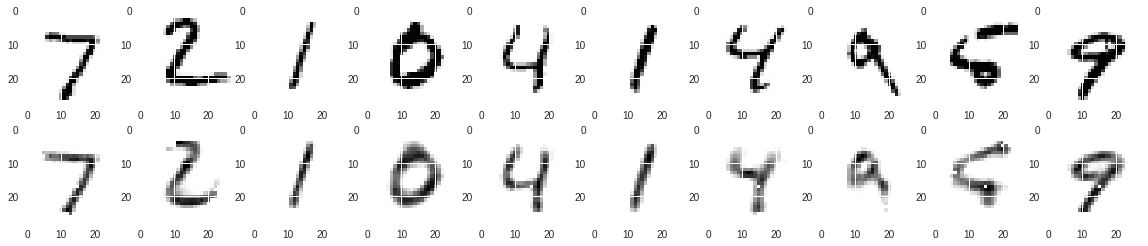

In [25]:
f, a = plt.subplots(2, 10, figsize=(20, 4))
for i in range(num_test_images):
  a[0][i].imshow(np.reshape(mnist.test.images[i],(28,28)))
  a[1][i].imshow(np.reshape(results[i],(28,28)))

# END